In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os

In [2]:
current_directory = os.getcwd()
file_path = os.path.join(os.path.dirname(current_directory), 'Dynamic data.xlsx')
df = pd.read_excel(file_path)

In [3]:
# Получить значения времени (годы) и значения WOPR:P1
years = df['YEARS']
values = df['WOPR:P1']

In [4]:
# Создать интерполяционную функцию для полиномиальной интерполяции
interpolated_function = interp1d(years, values, kind='quadratic', fill_value='extrapolate')


In [5]:
# Создать будущие значения времени для экстраполяции
future_years = np.arange(max(years) + 1, max(years) + 37)  # Прогноз на следующие 36 месяцев (3 года)


In [6]:
# Получить прогнозируемые значения WOPR:P1
forecast_values = interpolated_function(future_years)


In [7]:
forecast_values = np.maximum(forecast_values, 0)

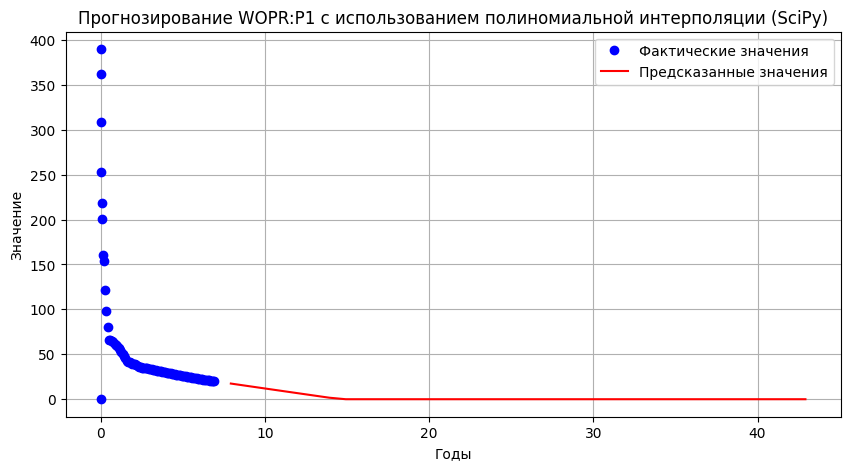

<Figure size 640x480 with 0 Axes>

In [9]:
# Вывести график предсказанных значений
plt.figure(figsize=(10, 5))
plt.plot(years, values, 'bo', label='Фактические значения')
plt.plot(future_years, forecast_values, 'r-', label='Предсказанные значения')
plt.title('Прогнозирование WOPR:P1 с использованием полиномиальной интерполяции (SciPy)')
plt.xlabel('Годы')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()
# Задаем прозрачный фон
plt.gcf().set_facecolor('none')

# Сохраняем график без белого фона (например, в формате PNG)
plt.savefig('plot.png', transparent=True)